# Functions

+ <a href="#functions">1.Built In Functions</a>
    + <a href="#string">String Functions</a>
    + <a href="#numeric">Numeric Functions</a>
    + <a href="#date">Date Functions</a>
+ <a href="#dates">2.Working with Dates</a>
+ <a href="#user">3.User Defined Functions</a>
+ <a href="#join">4.Working with Joins</a>
+ <a href="#challenges">5.Challenges</a>
----

# Set up

In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [2]:
spark

---

In [3]:
# preprocessed crimes data
from pyspark.sql.functions import to_timestamp, col, lit

In [4]:
rc = spark.read.csv('../data/chicago_crimes.csv', header=True).withColumn('Date', to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') <= lit('2018-11-11'))
rc.show(5)

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     00

------

<p id="functions"></p>

# 1) Built In Functions

In [5]:
from pyspark.sql import functions

In [8]:
# all available buit in functions
dir(functions)

['Column',
 'DataFrame',
 'DataType',
 'PandasUDFType',
 'PythonEvalType',
 'SparkContext',
 'StringType',
 'UserDefinedFunction',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_binary_mathfunctions',
 '_collect_list_doc',
 '_collect_set_doc',
 '_create_binary_mathfunction',
 '_create_column_from_literal',
 '_create_column_from_name',
 '_create_function',
 '_create_function_over_column',
 '_create_udf',
 '_create_window_function',
 '_functions',
 '_functions_1_4_over_column',
 '_functions_1_6_over_column',
 '_functions_2_1_over_column',
 '_functions_2_4',
 '_functions_deprecated',
 '_functions_over_column',
 '_lit_doc',
 '_message',
 '_options_to_str',
 '_string_functions',
 '_test',
 '_to_java_column',
 '_to_seq',
 '_window_functions',
 '_wrap_deprecated_function',
 'abs',
 'acos',
 'add_months',
 'approxCountDistinct',
 'approx_count_distinct',
 'array',
 'array_contains',
 'array_distinct',
 'array_exc

-------

<p id="string"></p>

## String Functions

### Display the Primary Type column in lower and upper characters, and the first 4 characters of the column

In [11]:
from pyspark.sql.functions import lower, upper, substring

**NOTE: for substring Position is 1 based, not 0 based (not start from 0 like other languages)**

In [12]:
# help(substring)

Help on function substring in module pyspark.sql.functions:

substring(str, pos, len)
    Substring starts at `pos` and is of length `len` when str is String type or
    returns the slice of byte array that starts at `pos` in byte and is of length `len`
    when str is Binary type.
    
    .. note:: The position is not zero based, but 1 based index.
    
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(substring(df.s, 1, 2).alias('s')).collect()
    [Row(s='ab')]
    
    .. versionadded:: 1.5



In [14]:
# first, check Primary Type column is String or not
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [24]:
rc.select(lower(col('Primary Type')), upper(col('Primary Type')), substring(col('Primary Type'), 1, 4)).show(5)

+-------------------+-------------------+-----------------------------+
|lower(Primary Type)|upper(Primary Type)|substring(Primary Type, 1, 4)|
+-------------------+-------------------+-----------------------------+
|            battery|            BATTERY|                         BATT|
|              theft|              THEFT|                         THEF|
|              theft|              THEFT|                         THEF|
|          narcotics|          NARCOTICS|                         NARC|
|            assault|            ASSAULT|                         ASSA|
+-------------------+-------------------+-----------------------------+
only showing top 5 rows



------

<p id="numeric"></p>

## Numeric Functions

### Show the oldest date and most recent date

In [25]:
from pyspark.sql.functions import min, max

In [27]:
rc.select(min(col('Date'))).show(1)

+-------------------+
|          min(Date)|
+-------------------+
|2001-01-01 00:00:00|
+-------------------+



In [28]:
rc.select(max(col('Date'))).show(1)

+-------------------+
|          max(Date)|
+-------------------+
|2018-11-11 00:00:00|
+-------------------+



-------

### What is 3 days earlier than the oldest date and 3 days later than the most recent date?

In [29]:
from pyspark.sql.functions import date_add, date_sub

In [30]:
help(date_add)

Help on function date_add in module pyspark.sql.functions:

date_add(start, days)
    Returns the date that is `days` days after `start`
    
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(date_add(df.dt, 1).alias('next_date')).collect()
    [Row(next_date=datetime.date(2015, 4, 9))]
    
    .. versionadded:: 1.5



In [ ]:
# 3 days earlier than the oldest date
rc.select(date_sub(min(col('Date')), 3)).show(1)

In [ ]:
# 3 days later than the recent date
rc.select(date_add(max(col('Date')), 3)).show(1)

------

<p id="dates"></p>

# 2) Working with Dates

In [5]:
from pyspark.sql.functions import to_date, to_timestamp, lit

### Parsing different strings to Date and Timestamp

### 2019-12-25 13:30:00

In [7]:
df = spark.createDataFrame([('2019-12-25 13:30:00', )], ['Christmas']) #value, column name

In [8]:
df.show(1)

+-------------------+
|          Christmas|
+-------------------+
|2019-12-25 13:30:00|
+-------------------+



In [10]:
# parse to date and timestamp
df.select(to_date(col('Christmas'), 'yyyy-MM-dd HH:mm:ss')).show()

+-------------------------------------------+
|to_date(`Christmas`, 'yyyy-MM-dd HH:mm:ss')|
+-------------------------------------------+
|                                 2019-12-25|
+-------------------------------------------+



In [11]:
df.select(to_timestamp(col('Christmas'),  'yyyy-MM-dd HH:mm:ss')).show()

+------------------------------------------------+
|to_timestamp(`Christmas`, 'yyyy-MM-dd HH:mm:ss')|
+------------------------------------------------+
|                             2019-12-25 13:30:00|
+------------------------------------------------+



### 25/Dec/2019 13:30:00

In [13]:
df = spark.createDataFrame([('25/Dec/2019 13:30:00', )], ['Christmas'])

In [14]:
df.show()

+--------------------+
|           Christmas|
+--------------------+
|25/Dec/2019 13:30:00|
+--------------------+



In [15]:
# parse to date and timestamp

In [18]:
df.select(to_date(col('Christmas'), 'dd/MMM/yyyy HH:mm:ss')).show()

+--------------------------------------------+
|to_date(`Christmas`, 'dd/MMM/yyyy HH:mm:ss')|
+--------------------------------------------+
|                                  2019-12-25|
+--------------------------------------------+



In [19]:
df.select(to_timestamp(col('Christmas'), 'dd/MMM/yyyy HH:mm:ss')).show()

+-------------------------------------------------+
|to_timestamp(`Christmas`, 'dd/MMM/yyyy HH:mm:ss')|
+-------------------------------------------------+
|                              2019-12-25 13:30:00|
+-------------------------------------------------+



### 12/25/2019 01:30:00 PM

In [23]:
df = spark.createDataFrame([('12/25/2019 01:30:00 PM' ,)], ['Christmas'])
df.show(1, truncate=False)

+----------------------+
|Christmas             |
+----------------------+
|12/25/2019 01:30:00 PM|
+----------------------+



In [21]:
# parse to date and timestamp

In [25]:
df.select(to_date(col('Christmas'), 'MM/dd/yyyy hh:mm:ss a')).show()

+---------------------------------------------+
|to_date(`Christmas`, 'MM/dd/yyyy hh:mm:ss a')|
+---------------------------------------------+
|                                   2019-12-25|
+---------------------------------------------+



In [26]:
df.select(to_timestamp(col('Christmas'), 'MM/dd/yyyy hh:mm:ss a')).show()

+--------------------------------------------------+
|to_timestamp(`Christmas`, 'MM/dd/yyyy hh:mm:ss a')|
+--------------------------------------------------+
|                               2019-12-25 13:30:00|
+--------------------------------------------------+



------

In [27]:
new_rc = spark.read.csv('../data/chicago_crimes.csv', header=True)

In [29]:
new_rc.show(2, truncate=False)

+--------+-----------+----------------------+-------------------+----+------------+-----------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+------------+-------------+-----------------------------+
|ID      |Case Number|Date                  |Block              |IUCR|Primary Type|Description            |Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On            |Latitude    |Longitude    |Location                     |
+--------+-----------+----------------------+-------------------+----+------------+-----------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+------------+-------------+-----------------------------+
|10224738|HY411648   |09/05/2015 01:30:00 PM|043XX S WOOD ST    |0486|BATTERY     |DOMESTIC BATTERY SIM

---------

<p id="user"></p>

# 3) User Defined Functions

- can create functions in Java, Scala, Python and R
- For performance, write functions in Java or Scala
- we can still access those functions from Python

-------

<p id="join"></p>

# 4) Working with Joins

- Police Stations Data set

https://data.cityofchicago.org/Public-Safety/Police-Stations/z8bn-74gv

In [31]:
rc = spark.read.csv('../data/chicago_crimes.csv', header=True).withColumn('Date', to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') <= lit('2018-11-11'))
rc.show(2)

+--------+-----------+-------------------+-------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|              Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+-------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|2015-09-05 13:30:00|    043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     009|  

###  download police stations dataset

In [32]:
# !wget -0 police-station.csv https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD

# !ls -l

In [33]:
ps = spark.read.csv('../data/Police_Stations.csv', header=True)
ps.show(2)

+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|    DISTRICT|DISTRICT NAME|            ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        null|        null|        null| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 1172080.029| 1908086.527|41.90324165|-87.64335214|(41.9032416531, -

# Joins

### The reported crimes datasets has only district numbers. Add the district name by joining with police station dataset.

### Caching data
- as Report Crimes data set is very big, we will cache it to speed things up during joining
- Since Cache command or Caching function is lazily evaluated, using Action Function (such as count) to get that Data Frame into cache as soon as possible.

In [34]:
rc.cache()
rc.count()

6753787

In [35]:
# get the distinct values of distrct names from police station dataset
ps.select(col('DISTRICT')).distinct().show(30)

+--------------------+
|            DISTRICT|
+--------------------+
|                   7|
|                  15|
|                  11|
|                   3|
|                   8|
|                  22|
|                  16|
|                   5|
|                  18|
|                  17|
|                   6|
|                  19|
|                  25|
|        Headquarters|
|                  24|
|                   9|
|                   1|
|                  20|
|                  10|
|                   4|
|                  12|
|                  14|
|                   2|
|",Chicago,IL,6060...|
+--------------------+



In [36]:
# also get distinct values of distrct names from reported crimes dataset
rc.select(col('District')).distinct().show(30)

+--------+
|District|
+--------+
|     009|
|     012|
|     024|
|    null|
|     031|
|     015|
|     006|
|     019|
|     020|
|     011|
|     025|
|     005|
|     003|
|     016|
|     018|
|     008|
|     022|
|     001|
|     014|
|     010|
|     004|
|     017|
|     007|
|     021|
|     002|
+--------+



As we can see from the data, District Number from Police Station doesn't have leading Zero. But Reported Crimes's District Number have leading Zero. So we need to manipulate those data.

#### Put lpad on police station's District Number so that format can be same as Reporte Crime's one

In [37]:
from pyspark.sql.functions import lpad

In [38]:
help(lpad)

Help on function lpad in module pyspark.sql.functions:

lpad(col, len, pad)
    Left-pad the string column to width `len` with `pad`.
    
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(lpad(df.s, 6, '#').alias('s')).collect()
    [Row(s='##abcd')]
    
    .. versionadded:: 1.5



In [39]:
ps.select(lpad(col('DISTRICT'), 3, '0')).show(5)

+--------------------+
|lpad(DISTRICT, 3, 0)|
+--------------------+
|                 Hea|
|                 018|
|                 019|
|                 020|
|                 022|
+--------------------+
only showing top 5 rows



#### create new column in police station for new padded value

In [40]:

ps = ps.withColumn('Format_district', lpad(col('DISTRICT'), 3, '0'))

In [42]:
ps.show(5, truncate=False)

+------------+-------------+-------------------+-------+-----+-----+----------------------------------------------------------------------------+------------+------------+------------+------------+------------+-----------+------------+-------------------------------+---------------+
|DISTRICT    |DISTRICT NAME|ADDRESS            |CITY   |STATE|ZIP  |WEBSITE                                                                     |PHONE       |FAX         |TTY         |X COORDINATE|Y COORDINATE|LATITUDE   |LONGITUDE   |LOCATION                       |Format_district|
+------------+-------------+-------------------+-------+-----+-----+----------------------------------------------------------------------------+------------+------------+------------+------------+------------+-----------+------------+-------------------------------+---------------+
|Headquarters|Headquarters |3510 S Michigan Ave|Chicago|IL   |60653|http://home.chicagopolice.org                                               |nul

### join with Left Outer Join

In [44]:
rc.join(ps, rc.District == ps.Format_district, 'left_outer').show(2, truncate=False)

+--------+-----------+-------------------+-------------------+----+------------+-----------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+------------+-------------+-----------------------------+--------+-------------+-----------------+-------+-----+-----+-----------------------------------------------------------------------+------------+------------+------------+------------+------------+-----------+------------+-------------------------------+---------------+
|ID      |Case Number|Date               |Block              |IUCR|Primary Type|Description            |Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On            |Latitude    |Longitude    |Location                     |DISTRICT|DISTRICT NAME|ADDRESS          |CITY   |STATE|ZIP  |WEBSITE                                                                |PHONE

#### As joined data looks a bit messy, we will clean up dropping unecessary columns from police stataion dataset When JOINING

In [46]:
ps.columns

['DISTRICT',
 'DISTRICT NAME',
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'Format_district']

In [49]:
rc.join(ps, rc.District == ps.Format_district, 'left_outer').drop(
' ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
).show(2, truncate=False)

+--------+-----------+-------------------+-------------------+----+------------+-----------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+----------------------+--------+-------------+-----------------+---------------+
|ID      |Case Number|Date               |Block              |IUCR|Primary Type|Description            |Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|Year|Updated On            |DISTRICT|DISTRICT NAME|ADDRESS          |Format_district|
+--------+-----------+-------------------+-------------------+----+------------+-----------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+----------------------+--------+-------------+-----------------+---------------+
|10224738|HY411648   |2015-09-05 13:30:00|043XX S WOOD ST    |0486|BATTERY     |DOMESTIC BATTERY SIMPLE|RESIDENCE           |false |true    |0924|009     |12  |61            |08B     |2015|0

-------

<p id="challenges"></p>

# 5) Challenges

- What is the most frequently reported non-criminal activity?
- Which day of the week has the most crimes reported?

### What is the most frequently reported non-criminal activity?

In [50]:
rc.show(2, truncate=False)

+--------+-----------+-------------------+-------------------+----+------------+-----------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+------------+-------------+-----------------------------+
|ID      |Case Number|Date               |Block              |IUCR|Primary Type|Description            |Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On            |Latitude    |Longitude    |Location                     |
+--------+-----------+-------------------+-------------------+----+------------+-----------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+------------+-------------+-----------------------------+
|10224738|HY411648   |2015-09-05 13:30:00|043XX S WOOD ST    |0486|BATTERY     |DOMESTIC BATTERY SIMPLE|RESIDENC

**How to classify non criminal activity?**

First we wil check Primary Type column.

In [52]:
rc.select(col('Primary Type')).distinct().count()

36

In [55]:
rc.select(col('Primary Type')).distinct().orderBy(col('Primary Type')).show(36, truncate=False)

+---------------------------------+
|Primary Type                     |
+---------------------------------+
|ARSON                            |
|ASSAULT                          |
|BATTERY                          |
|BURGLARY                         |
|CONCEALED CARRY LICENSE VIOLATION|
|CRIM SEXUAL ASSAULT              |
|CRIMINAL DAMAGE                  |
|CRIMINAL SEXUAL ASSAULT          |
|CRIMINAL TRESPASS                |
|DECEPTIVE PRACTICE               |
|DOMESTIC VIOLENCE                |
|GAMBLING                         |
|HOMICIDE                         |
|HUMAN TRAFFICKING                |
|INTERFERENCE WITH PUBLIC OFFICER |
|INTIMIDATION                     |
|KIDNAPPING                       |
|LIQUOR LAW VIOLATION             |
|MOTOR VEHICLE THEFT              |
|NARCOTICS                        |
|NON - CRIMINAL                   |
|NON-CRIMINAL                     |
|NON-CRIMINAL (SUBJECT SPECIFIED) |
|OBSCENITY                        |
|OFFENSE INVOLVING CHILDREN 

We can see from the above result, there are 3 types of NON-CRIMINAL ones.

So we will get the filtered non criminal new dataset using those 3 conditions.

In [57]:
nc = rc.filter((col('Primary Type') == 'NON - CRIMINAL') | (col('Primary Type') == 'NON-CRIMINAL') | (col('Primary Type') == 'NON-CRIMINAL (SUBJECT SPECIFIED)'))

In [60]:
nc.show(5, truncate=False)

+--------+-----------+-------------------+---------------------+----+--------------+-----------------+-------------------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+------------+-------------+-----------------------------+
|ID      |Case Number|Date               |Block                |IUCR|Primary Type  |Description      |Location Description           |Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On            |Latitude    |Longitude    |Location                     |
+--------+-----------+-------------------+---------------------+----+--------------+-----------------+-------------------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+------------+-------------+-----------------------------+
|10233370|HY421530   |2015-09-13 10:45:00|010XX S MENARD AVE   |5114|NON - CRIMINAL|F

Then we will groupby Description column.


In [62]:
nc.groupBy(col('Description')).count().orderBy('count', ascending=False).show(truncate=False)

+-------------------------------------------+-----+
|Description                                |count|
+-------------------------------------------+-----+
|LOST PASSPORT                              |107  |
|FOID - REVOCATION                          |75   |
|NOTIFICATION OF CIVIL NO CONTACT ORDER     |9    |
|NOTIFICATION OF STALKING - NO CONTACT ORDER|8    |
|CONCEALED CARRY LICENSE REVOCATION         |5    |
|FOUND PASSPORT                             |4    |
|GUN OFFENDER NOTIFICATION-NO CONTACT       |3    |
+-------------------------------------------+-----+



It seem like LOST PASSPORT is the most frequent Non criminal related reported cases.

-----------------------

----------------------

### Which day of the week has the most crimes reported?

https://spark.apache.org/docs/latest/sql-ref-datetime-pattern.html

In [63]:
from pyspark.sql.functions import dayofweek

In [64]:
help(dayofweek)

Help on function dayofweek in module pyspark.sql.functions:

dayofweek(col)
    Extract the day of the week of a given date as integer.
    
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(dayofweek('dt').alias('day')).collect()
    [Row(day=4)]
    
    .. versionadded:: 2.3



In [66]:
rc.show(1, truncate=False)

+--------+-----------+-------------------+---------------+----+------------+-----------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+------------+-------------+-----------------------------+
|ID      |Case Number|Date               |Block          |IUCR|Primary Type|Description            |Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On            |Latitude    |Longitude    |Location                     |
+--------+-----------+-------------------+---------------+----+------------+-----------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+------------+-------------+-----------------------------+
|10224738|HY411648   |2015-09-05 13:30:00|043XX S WOOD ST|0486|BATTERY     |DOMESTIC BATTERY SIMPLE|RESIDENCE           |fal

In [67]:
# get the day of the weeks
rc.select(col('Date'), dayofweek(col('Date'))).show(2)

+-------------------+---------------+
|               Date|dayofweek(Date)|
+-------------------+---------------+
|2015-09-05 13:30:00|              7|
|2015-09-04 11:30:00|              6|
+-------------------+---------------+
only showing top 2 rows



Now we get the day of the week as integer value. but we want to format it as Monday, Tuesday, etc.

In [68]:
from pyspark.sql.functions import date_format

In [69]:
help(date_format)

Help on function date_format in module pyspark.sql.functions:

date_format(date, format)
    Converts a date/timestamp/string to a value of string in the format specified by the date
    format given by the second argument.
    
    A pattern could be for instance `dd.MM.yyyy` and could return a string like '18.03.1993'. All
    pattern letters of `datetime pattern`_. can be used.
    
    .. _datetime pattern: https://spark.apache.org/docs/latest/sql-ref-datetime-pattern.html
    .. note:: Use when ever possible specialized functions like `year`. These benefit from a
        specialized implementation.
    
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(date_format('dt', 'MM/dd/yyy').alias('date')).collect()
    [Row(date='04/08/2015')]
    
    .. versionadded:: 1.5



In [71]:
rc.select(col('Date'), dayofweek(col('Date')), date_format(col('Date'), 'E')).show(5)

+-------------------+---------------+--------------------+
|               Date|dayofweek(Date)|date_format(Date, E)|
+-------------------+---------------+--------------------+
|2015-09-05 13:30:00|              7|                 Sat|
|2015-09-04 11:30:00|              6|                 Fri|
|2018-09-01 00:01:00|              7|                 Sat|
|2015-09-05 12:45:00|              7|                 Sat|
|2015-09-05 13:00:00|              7|                 Sat|
+-------------------+---------------+--------------------+
only showing top 5 rows



In [72]:
rc.groupBy(date_format(col('Date'), 'E')).count().orderBy('count', ascending=False).show()

+--------------------+-------+
|date_format(Date, E)|  count|
+--------------------+-------+
|                 Fri|1017037|
|                 Wed| 973964|
|                 Tue| 968103|
|                 Sat| 965232|
|                 Thu| 964625|
|                 Mon| 952805|
|                 Sun| 912021|
+--------------------+-------+



We can see that "Friday" has the highest reported crimes. Prehaps people tend to go out on friday.

### Plotting the results

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
# collect the row objects
results = rc.groupBy(date_format(col('Date'), 'E')).count().orderBy('count').collect()

results

[Row(date_format(Date, E)='Sun', count=912021),
 Row(date_format(Date, E)='Mon', count=952805),
 Row(date_format(Date, E)='Thu', count=964625),
 Row(date_format(Date, E)='Sat', count=965232),
 Row(date_format(Date, E)='Tue', count=968103),
 Row(date_format(Date, E)='Wed', count=973964),
 Row(date_format(Date, E)='Fri', count=1017037)]

In [75]:
day_of_week = [col[0] for col in results]

day_of_week

['Sun', 'Mon', 'Thu', 'Sat', 'Tue', 'Wed', 'Fri']

In [76]:
reported_counts = [col[1] for col in results]

reported_counts

[912021, 952805, 964625, 965232, 968103, 973964, 1017037]

In [78]:
df = pd.DataFrame({'Day Of Week': day_of_week, 'Count': reported_counts})

In [79]:
df.head()

,Day Of Week,Count
0,Sun,912021
1,Mon,952805
2,Thu,964625
3,Sat,965232
4,Tue,968103


In [85]:
df = df.sort_values(by='Count', ascending=False)

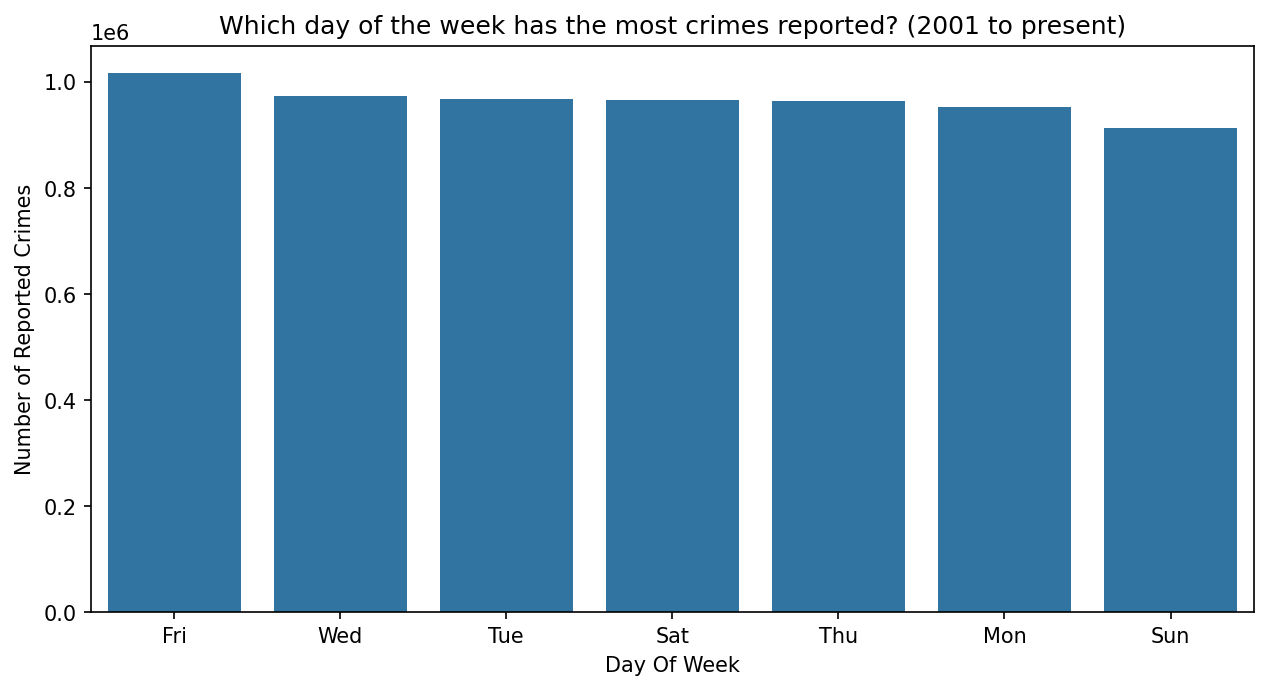

In [93]:
base_color = sns.color_palette()[0]

plt.figure(figsize=(10, 5), dpi=150)
sns.barplot(data=df, x='Day Of Week', y='Count', color=base_color);

plt.ylabel('Number of Reported Crimes')
plt.title('Which day of the week has the most crimes reported? (2001 to present)');